# Multiple Linear Regression using sample data generated by ChatGPT

## Dr N J Honeyman MA DCrimJ

The aim of this exercise is to synthesise raw data using ChatGPT for analysis using Python. The business problem being solved with data is an evaluation of the factors influencing performance scores for students. The independent variables are the number of hours studied, the number of sleep hours, the location of the student, and access to tutors. The dependent variable is a synthesised performance score, representing a score from an academic examination. 

### Import libraries and raw data

In [8]:
# Import all required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
# Import dataset to be used 
data = pd.read_csv('/Users/neilhoneyman/Desktop/sample_regression_data.csv') 

### Conduct exploratory data analysis to visualise data

In [8]:
# Review the number of columns and rows
data.shape

(200, 5)

In [9]:
# Review the column names and data in the top 5 rows
data.head()

,Study_Hours,Sleep_Hours,Location_Type,Tutoring_Access,Performance_Score
0,54.967142,31.788937,Rural,No,184.694217
1,48.617357,32.803923,Rural,Yes,211.382774
2,56.476885,35.415256,Urban,No,236.700761
3,65.230299,35.269010,Urban,Yes,248.785775
4,47.658466,23.111653,Rural,No,163.824090


In [10]:
# Generate descriptive statistics for the min/max/mean values for each variable
data.describe()

,Study_Hours,Sleep_Hours,Performance_Score
count,200.000000,200.000000,200.000000
mean,49.592290,30.429341,196.783498
std,9.310039,4.935019,32.423709
min,23.802549,13.793663,116.215677
25%,42.948723,26.970812,178.209996
50%,49.958081,30.394197,196.866430
75%,55.008525,33.436156,215.560916
max,77.201692,49.263657,293.781515


In [11]:
# Generate information on the dataset to identify data types and any null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Study_Hours        200 non-null    float64
 1   Sleep_Hours        200 non-null    float64
 2   Location_Type      200 non-null    object 
 3   Tutoring_Access    200 non-null    object 
 4   Performance_Score  200 non-null    float64
dtypes: float64(3), object(2)
memory usage: 7.9+ KB


**'Location_Type' and 'Tutoring_Access' are categorical variables**

In [13]:
# List the values in the categorical variable 'Location Type'
data['Location_Type'].value_counts()

Location_Type
Suburban    68
Rural       66
Urban       66
Name: count, dtype: int64

In [14]:
# List the values in the categorical variable 'Tutoring Access'
data['Tutoring_Access'].value_counts()

Tutoring_Access
No     102
Yes     98
Name: count, dtype: int64

In [15]:
# List the mean performance score values for the categories in the 'Location Type' variable to identify any linear correlation 
print(data.groupby('Location_Type')['Performance_Score'].mean())

Location_Type
Rural       194.487714
Suburban    194.957871
Urban       200.960232
Name: Performance_Score, dtype: float64


In [16]:
# List the mean performance score values for the categories in the 'Tutoring Access' variable to identify any linear correlation
print(data.groupby('Tutoring_Access')['Performance_Score'].mean())

Tutoring_Access
No     193.838796
Yes    199.848392
Name: Performance_Score, dtype: float64


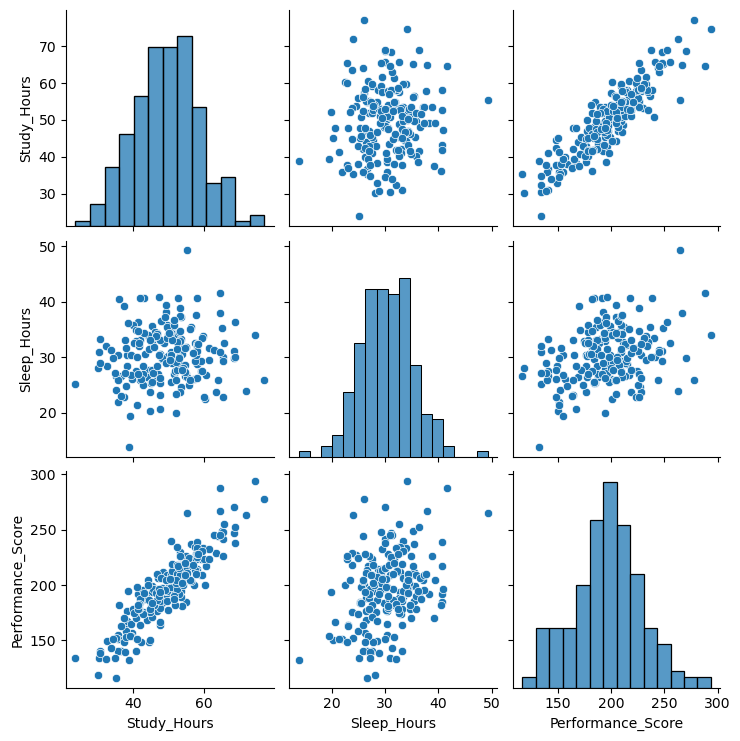

In [17]:
# Identify any linear correlation between continuous X variables and Y variable
sns.pairplot(data)

**There appears to be some linear correlation between study hours and performance, and to a lesser extent between sleep hours and performance.**

### Generate an Ordinary Least Squares (OLS) Model

In [20]:
# Create an ols data variable from the existing dataset
ols_data = data

# Define the formula to be used to analyse the Study Hours, Sleep Hours, and Tutoring access variables
ols_formula = 'Performance_Score ~ Study_Hours + Sleep_Hours + C(Tutoring_Access)'

# Create an OLS variable to calculate the model using the formula and dataset
OLS = ols(formula = ols_formula, data = ols_data)

# Create a model variable using the OLS fit function
model = OLS.fit()

# Create a variable with the results of the model
model_results = model.summary()

# Review the results of the model
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance_Score   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     510.2
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           2.64e-92
Time:                        12:51:21   Log-Likelihood:                -761.49
No. Observations:                 200   AIC:                             1531.
Df Residuals:                     196   BIC:                             1544.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -9.1339      6.232     -1.466      0.144     -21.425       3.157
C(Tutoring_Access)[T.Yes]     9.7936      1.560      6.277      0.000       6.717      12.871
Study_Hours                   3.0797      0.084     36.524      0.000       2.913       3.246
Sleep_Hours                   1.5903      0.159     10.008      0.000       1.277       1.904
==============================================================================
Omnibus:                        2.408   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                2.391
Skew:                           0.002   Prob(JB):                        0.303
Kurtosis:                       3.536   Cond. No.                         472.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Analysing the results and testing assumptions

R2 and adjusted R2 values are relatively high at 88%, which means we have 88% confidence that changes in the X values are responsible for changes in Y, or that **higher study hours, sleep hours, and tutoring access are responsible for higher performance scores.** 

The P values of 0.000 mean that the results are **highly statistically significant**.    

The linear regression equation translates as: **Performance Score** = -9.13(**intercept**) + 9.79(**tutoring_acces**: yes) + (3.08 * **study_hours**) + (1.59 * **sleep_hours**)

#### Model Assumption - Linearity

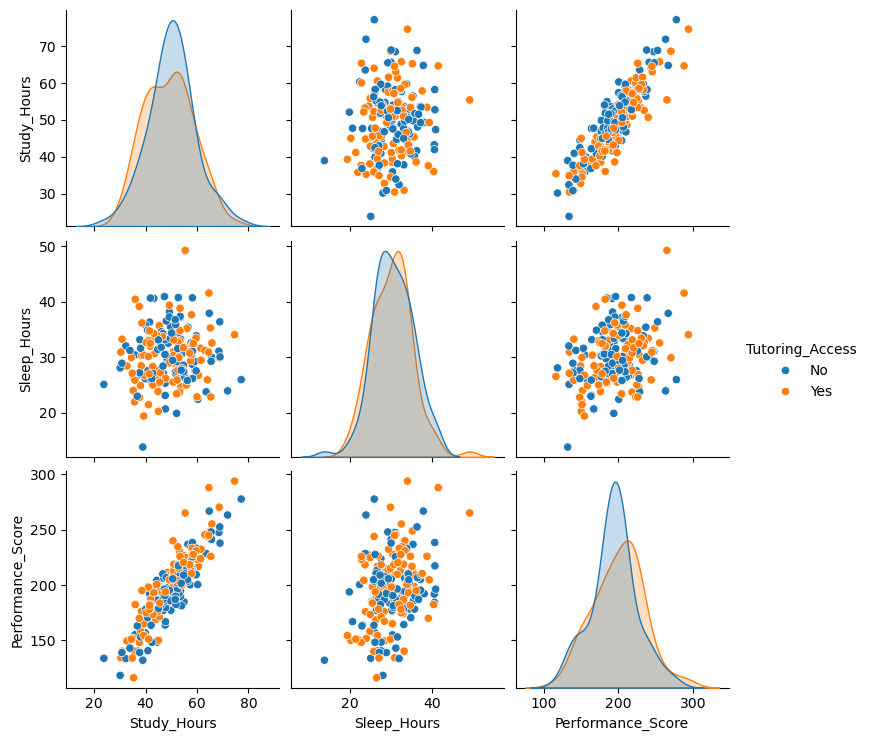

In [26]:
sns.pairplot(ols_data, vars=['Study_Hours', 'Sleep_Hours', 'Performance_Score'], hue='Tutoring_Access')

**The assumption of linearity has been met**

#### Model Assumption - Normality

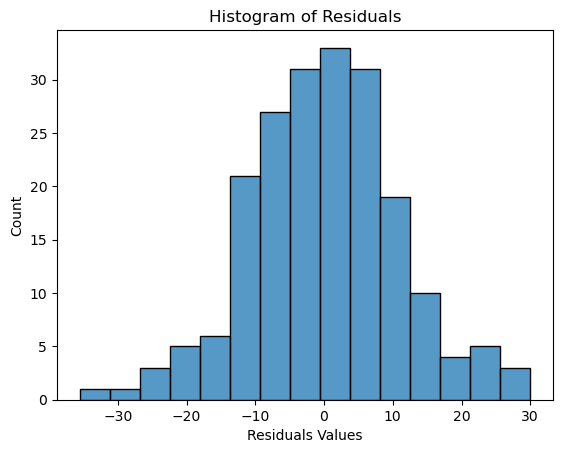

In [29]:
# Create a variable to store the residuals from the model
residuals = model.resid

# Create a histogram of the residuals to 
fig = sns.histplot(residuals)

# Set the X Axis label
fig.set_xlabel('Residuals Values')

# Set the title
fig.set_title('Histogram of Residuals')

# Show the histogram
plt.show()

The residuals show a normal distribution, **confirming the normal distribution assumption has not been violated**

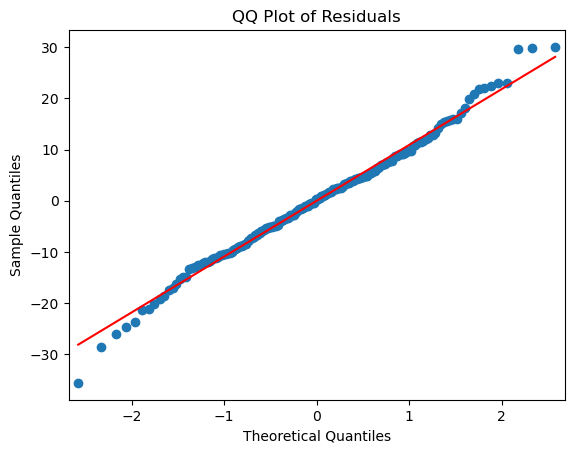

In [31]:
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

The QQ plot **confirms the assumption of normality**

#### Model Assumptions - Constant Variance

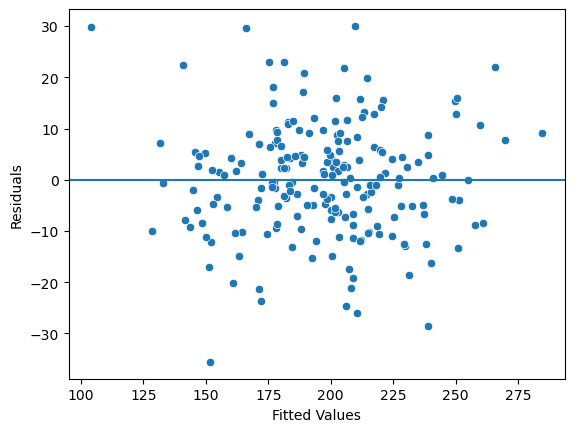

In [34]:
# Create a variable to store fitted values from the model
fitted_values = model.predict(ols_data)

# Create a scatterplot to plot fitted values against the residuals
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Place a horizontal line on the Y Axis at 0
fig.axhline(0)

# Set the X Axis label
fig.set_xlabel('Fitted Values')

# Set the Y Axis label
fig.set_ylabel('Residuals')

# Show the plot
plt.show()

Scatterplot confirms that the constant variance assumption has **not been violated**

#### Model Assumption - No Multicollinearity

In [37]:
# Create a variable to store the sleep and study hours for analysis 
X = data[['Sleep_Hours', 'Study_Hours']]

# Create a constant variable 
X = sm.add_constant(X) # Necessary to avoid erronious VIF values

# Create a variable for the Variance Inflation Factor calculation
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a dataframe with the VIF results
df_vif = pd.DataFrame({'Variable': X.columns, 'VIF': vif})      

# Display VIF dataframe
df_vif


,Variable,VIF
0,const,61.998196
1,Sleep_Hours,1.009136
2,Study_Hours,1.009136


**The VIF scores are low (<5), demonstrating very low correlation between the two X variables** 

In [39]:
# Assess correlation between X variables to ensure they are not skewing the model
ols_data[['Study_Hours', 'Sleep_Hours']].corr()

,Study_Hours,Sleep_Hours
Study_Hours,1.000000,0.095147
Sleep_Hours,0.095147,1.000000


No correlation between independent values, **the no multicollinerarity assumption has not been violated**

### Conclusions

In [42]:
# Display model results
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance_Score   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     510.2
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           2.64e-92
Time:                        12:51:21   Log-Likelihood:                -761.49
No. Observations:                 200   AIC:                             1531.
Df Residuals:                     196   BIC:                             1544.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -9.1339      6.232     -1.466      0.144     -21.425       3.157
C(Tutoring_Access)[T.Yes]     9.7936      1.560      6.277      0.000       6.717      12.871
Study_Hours                   3.0797      0.084     36.524      0.000       2.913       3.246
Sleep_Hours                   1.5903      0.159     10.008      0.000       1.277       1.904
==============================================================================
Omnibus:                        2.408   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                2.391
Skew:                           0.002   Prob(JB):                        0.303
Kurtosis:                       3.536   Cond. No.                         472.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. R2 and adjusted R2 values are relatively high at 88%, which means we have **88% confidence** that changes in the X values are responsible for changes in Y, or that higher study hours, sleep hours, and tutoring access are responsible for higher performance scores.

2. The P values of 0.000 mean that the results are **highly statistically significant**.

3. The linear regression equation translates as: **Performance Score** = -9.13(**intercept**) + 9.79(**tutoring_access**: yes) + (3.08 * **study_hours**) + (1.59 * **sleep_hours**)

4. A student with access to a tutor, who studies for **49 hours** and sleeps for **30 hours** per week is therefore like to achieve a performance score of: -9.13 + 9.79 + 150.92 + 47.7 = **199.28**. This broadly correlates with the mean values for study and sleep hours and the mean values for performance. 